###### Your goal is to evaluate whether or not the probabilities that are spat out by your model are sensible and interpretable. One way to do this is to plot the probability given by the model on the X axis (lets say bucketed every 10%) and the y axis should be the % of data points that actually belong to that class.

###### Your task here is to load up the same glass dataset we used previously. Fit a logistic regression of aluminum on the categorical variable "household glass" and use the method above to make sense of the probabilities

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

###### Load in the dataset into a df called glass

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort('al', inplace=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


###### Create a categorical varaible called household, which is 1 if glass_type is 5,6,7

In [3]:
def is_household(df):
    if df['glass_type'] > 4:
        return 1
    else:
        return 0

In [4]:
glass['household'] = glass.apply(is_household, axis=1)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0,0.16,1,0


###### Instantiate a LogisticRegression estimator, and fit it to the data. Note if your using the glass DataFrame, when you pass it into the .fit() pass it in as a DataFrame, so like this: glass[['al']]

In [5]:
X = glass[['al']]
y = glass.household
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

###### Create a new dataframe that holds the predicted probability that a piece of glass is household, and a column that has the true class

In [116]:
new_predicts = pd.DataFrame(lr.predict_proba(X), index = glass.index)
new_predicts['true_class'] = glass['glass_type']
new_predicts.columns = ['predicted_prob', 'asdf', 'true_class']
new_predicts = new_predicts.drop('asdf', 1)

In [117]:
new_predicts = new_predicts[new_predicts.true_class > 4]

###### Group the data by the predicted_probabilities rounded to the nearest .1 AS WELL as by the true class. Hint: there is a .round()

In [149]:
df_grouped = new_predicts.groupby(new_predicts.predicted_prob.round(2))

###### Unstack the data so that the 0s and 1s are unique columns and fill the missing values with 0s .fillna(0)

In [161]:
status = ['confused', 'no longer confused']
current_status = status[0]
print "I'm %s about where the 0s and 1s should be coming from" % current_status

I'm confused about where the 0s and 1s should be coming from


###### Calculate the ratio of correctly predicted probabilities, and plot

In [162]:
ratio = (new_predicts['predicted_prob'] > .75) / len(new_predicts)

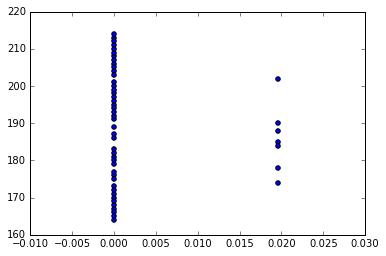

In [169]:
plt.scatter(ratio, new_predicts.index)

In [168]:
print "I don't thing that's right"

I don't thing that's right


###### How can you improve the performance of Logistic regression by including more variables?

In [170]:
print "with more variables you would be have more confidence in your probability estimations"

with more variables you would be have more confidence in your probability estimations
